In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
BTC = yf.download('BTC-USD', start='2022-12-26', end='2022-12-27',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-26 00:00:00,16842.250000,16842.250000,16842.250000,16842.250000,16842.250000,0
2022-12-26 00:01:00,16841.634766,16841.634766,16841.634766,16841.634766,16841.634766,0
2022-12-26 00:02:00,16840.742188,16840.742188,16840.742188,16840.742188,16840.742188,0
2022-12-26 00:03:00,16841.238281,16841.238281,16841.238281,16841.238281,16841.238281,733184
2022-12-26 00:04:00,16839.712891,16839.712891,16839.712891,16839.712891,16839.712891,0
...,...,...,...,...,...,...
2022-12-26 23:54:00,16896.162109,16896.162109,16896.162109,16896.162109,16896.162109,5237760
2022-12-26 23:55:00,16904.869141,16904.869141,16904.869141,16904.869141,16904.869141,30729216
2022-12-26 23:56:00,16912.722656,16912.722656,16912.722656,16912.722656,16912.722656,24491008


In [4]:
ETH = yf.download('ETH-USD', start='2022-12-26', end='2022-12-27',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETH 

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-26 00:00:00,1218.920166,1218.920166,1218.920166,1218.920166,1218.920166,0
2022-12-26 00:01:00,1218.788818,1218.788818,1218.788818,1218.788818,1218.788818,0
2022-12-26 00:02:00,1218.675781,1218.675781,1218.675781,1218.675781,1218.675781,582912
2022-12-26 00:03:00,1218.585815,1218.585815,1218.585815,1218.585815,1218.585815,613888
2022-12-26 00:04:00,1218.458252,1218.458252,1218.458252,1218.458252,1218.458252,3386368
...,...,...,...,...,...,...
2022-12-26 23:54:00,1225.294800,1225.294800,1225.294800,1225.294800,1225.294800,2302976
2022-12-26 23:55:00,1226.134766,1226.134766,1226.134766,1226.134766,1226.134766,14439936
2022-12-26 23:56:00,1226.687500,1226.687500,1226.687500,1226.687500,1226.687500,11586560


In [6]:
S1_0 = BTC ['Open'][0]
S2_0 = ETH ['Open'][0]

In [7]:
S1_0

16842.25

In [8]:
S2_0

1218.920166015625

In [9]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1436
mu_2 = lr2.mean() * 1436
sigma_1 = lr1.std() * np.sqrt(1436)
sigma_2 = lr2.std() * np.sqrt(1436)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 1
T = 1
M = len(ETH)

In [10]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [11]:
beta 

1.3064088416441475

In [12]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [13]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Cryptocurrency Price')

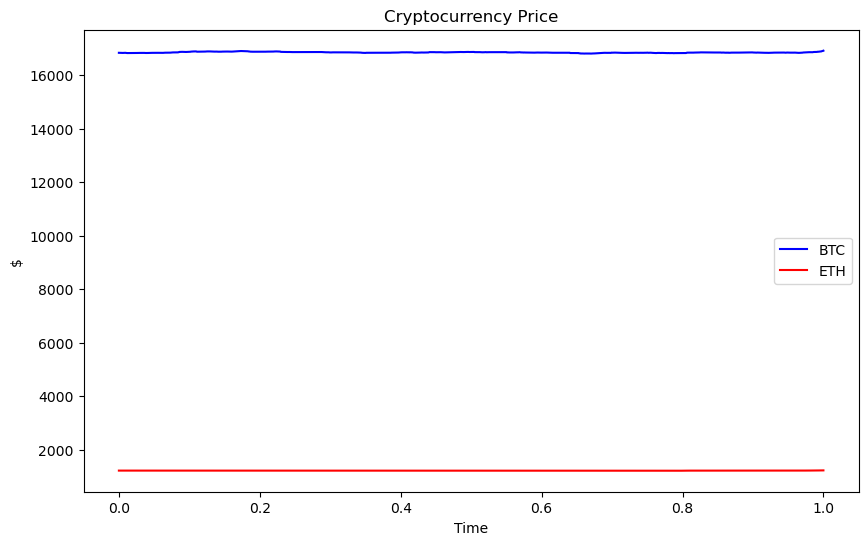

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrency Price')

Text(0.5, 1.0, 'z')

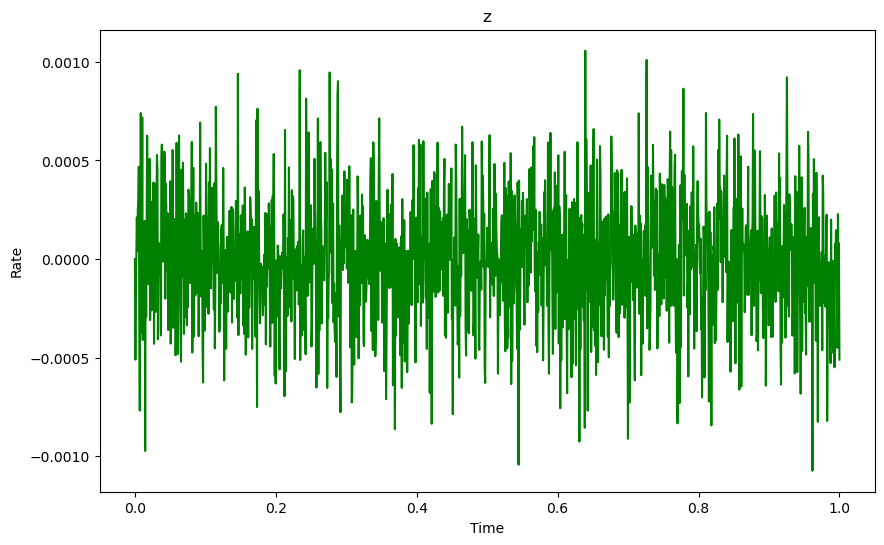

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

# Optimal Weights

In [16]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
  


Text(0.5, 1.0, 'Weights')

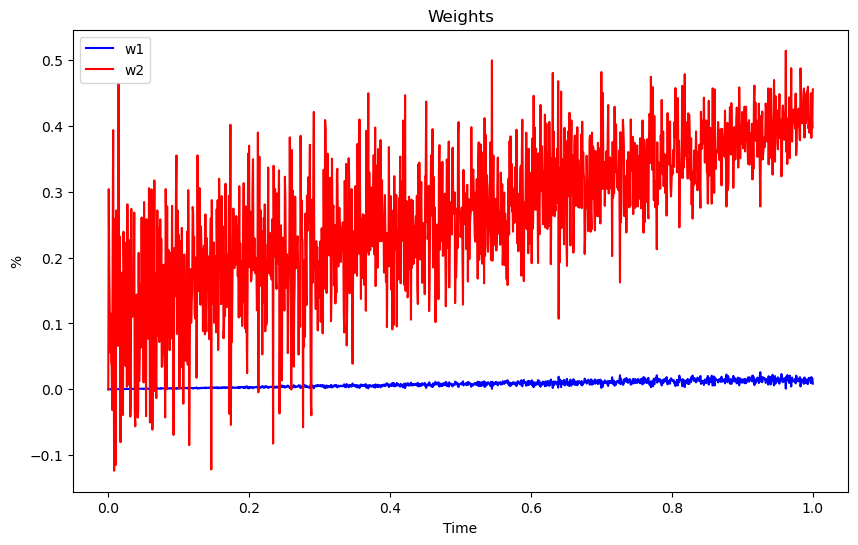

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Optimal Wealth Process - Negative means selling and you get cash

Text(0.5, 1.0, 'Cash')

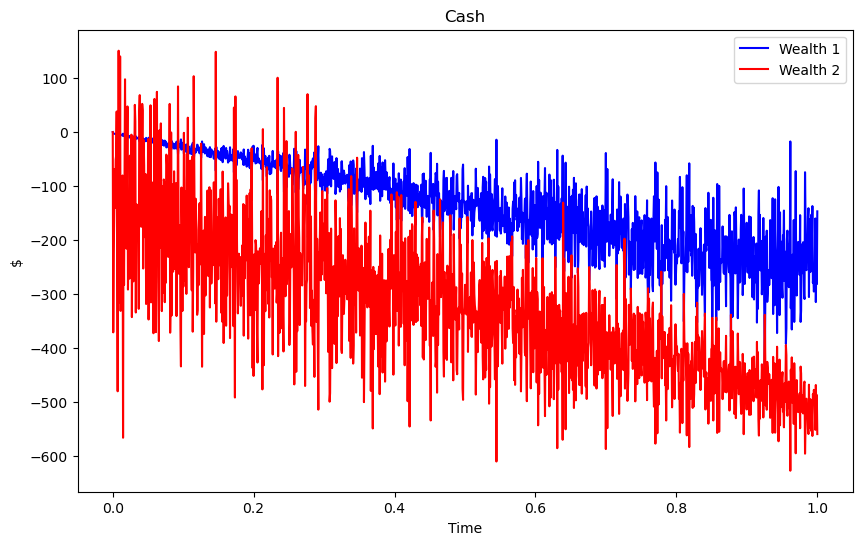

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tt, - Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, - Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [19]:
Pi_1.mean()

0.0077714478216448744

In [20]:
Cash = abs(Pi_1 * S1 + Pi_2 * S2)

Text(0.5, 1.0, 'Total')

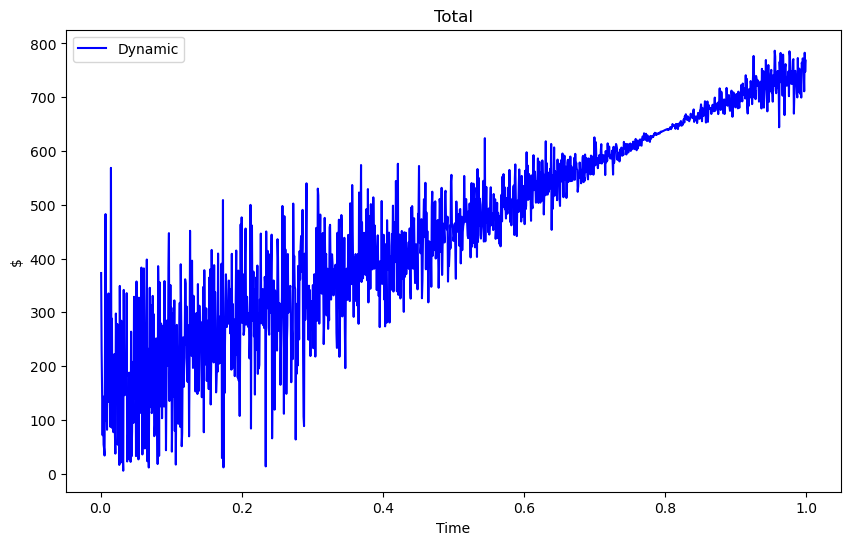

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:-1], Cash[1:-1], 'b', lw=1.5, label='Dynamic')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Total')

In [22]:
(Cash[-1]-Cash[1])/(Cash[1])

array([0.89131905])

In [23]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

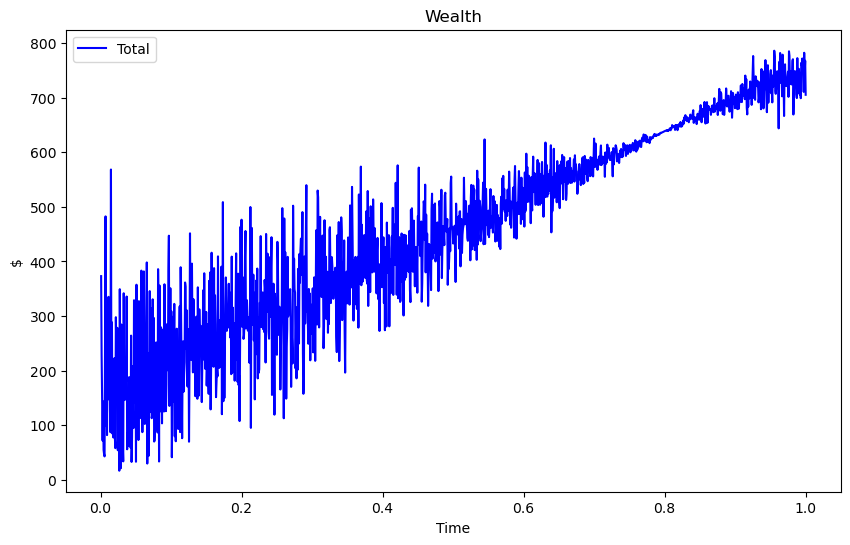

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Inital Wealth

In [25]:
Wealth[1]

array([373.08513996])

Ending Wealth

In [26]:
Wealth[-1]

array([705.6230343])

# Return

In [27]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([0.89131905])

In [28]:
Pi_1.mean()

0.0077714478216448744

In [29]:
Pi_2.mean()

0.26761864111497585

Text(0.5, 1.0, 'Comparison')

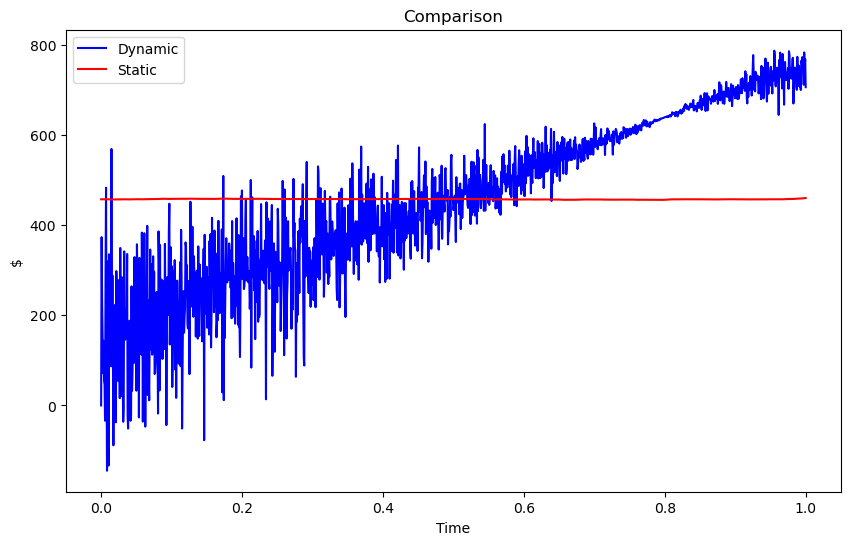

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [31]:
S1_0 = 16842.25
S2_0 = 1218.920166015625
mu_1 = 0.01
mu_2 = 0.02
sigma_1 = 0.05
sigma_2 = 0.1
rho = -0.7
z_0 = 0.01
beta = 1
gamma = 0.5
delta = 1
T = 1
M = 1436

In [32]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [33]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Cryptocurrency Price')

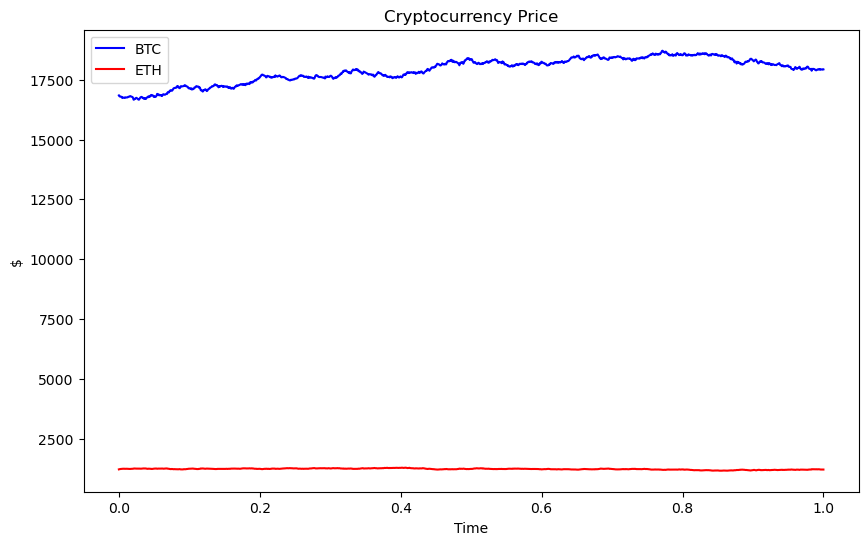

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrency Price')

Text(0.5, 1.0, 'z')

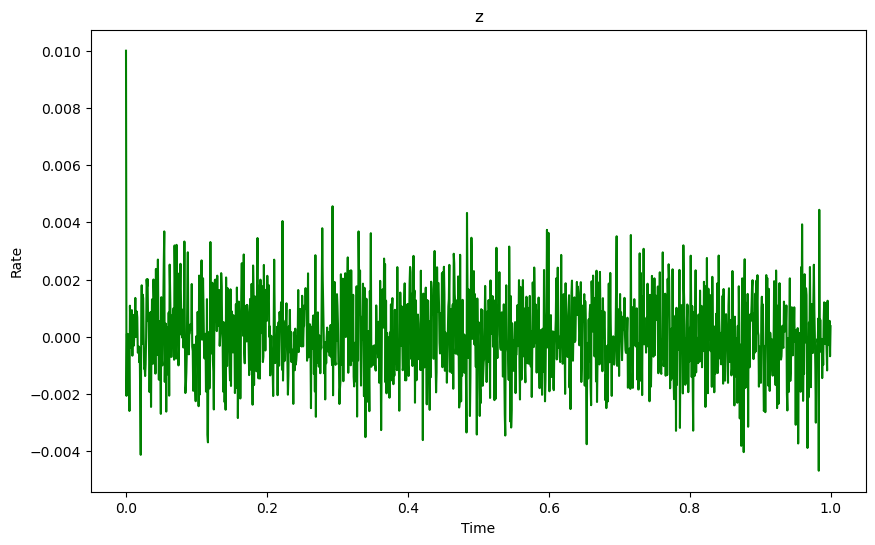

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [36]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
 

Text(0.5, 1.0, 'Weights')

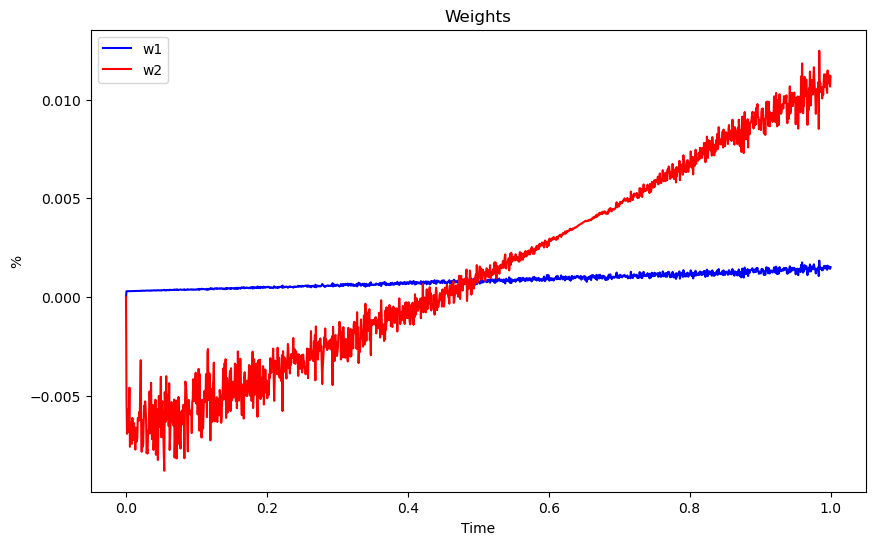

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

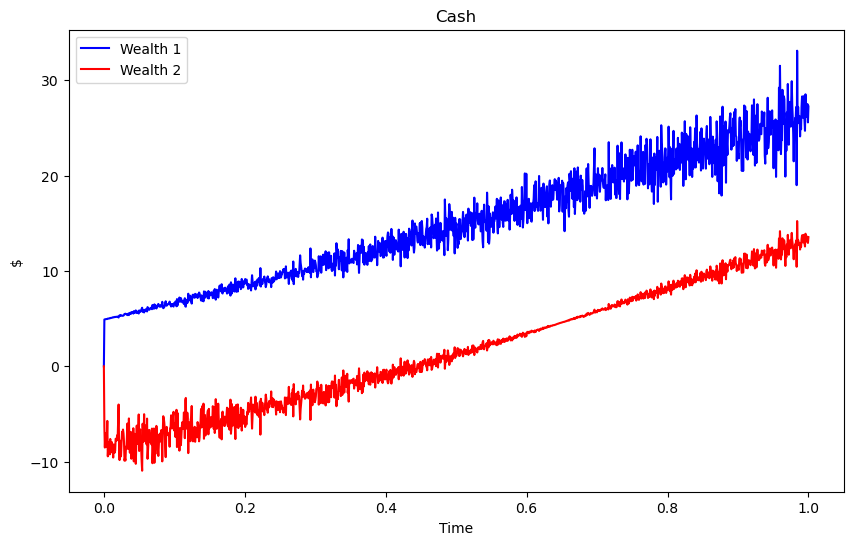

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [39]:

Pi_1.mean()

0.0008279343311424949

In [40]:
Pi_2.mean()

0.0013784839043844296

Text(0.5, 1.0, 'Comparison')

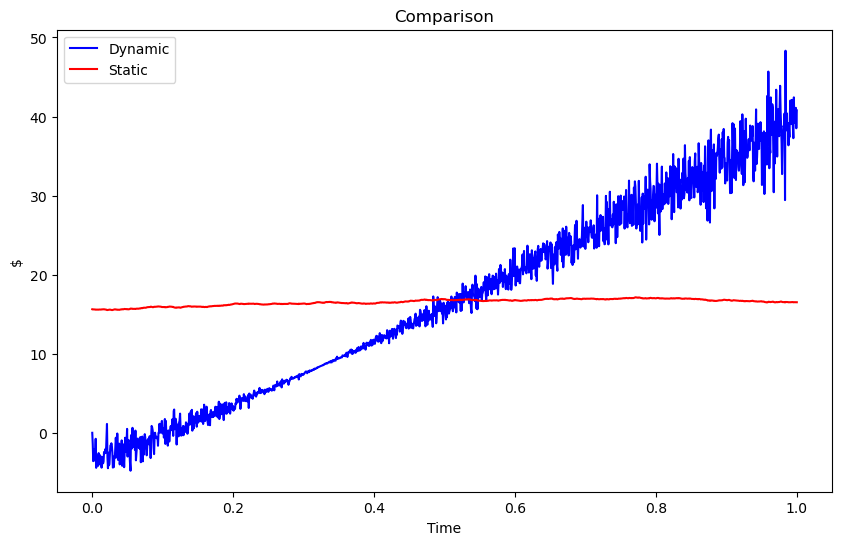

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')